- Pandas는 데이터프레임을 사용하기 위한 패키지
- Numpy는 수학적 연산을 하기 위한 패키지

In [1]:
import pandas as pd
import numpy as np

- 미리 준비된 csv파일 사용 (customer_data(filtered).csv)
- CP949는 한글을 위한 문자 인코딩

In [2]:
df = pd.read_csv('customer_data(filtered)_generated.csv', index_col=0, encoding = 'utf-8')
df.head()

,Score,Review,SNS,Addr,Score2
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


# 1. 특징값 추출

## 1.1 텍스트 데이터 특징값 추출

- 한국어 텍스트 분석을 위한 KoNLPy 설치
- http://konlpy-ko.readthedocs.io/ko/v0.4.4/
- 목차 > 사용하기 > 설치하기 > 윈도우


- Okt(구 Twitter) 형태소 분석기 import
- 형태소 분석기 Okt(구 twitter) 생성

In [3]:
from konlpy.tag import Okt
okt = Okt()

- Okt(구 Twitter) 형태소 분석기로 명사, 형용사를 추출하는 함수 tokenize를 생성
- For 문을 사용해 토큰의 품사가 명사, 형용사일 경우 리스트 변수 stems에 저장
- 3번 줄의 pos() 함수는 주어진 텍스트를 토큰화하여 품사를 판별하고 태그를 붙여줌

In [4]:
def tokenize(text):
    stems = []
    tagged = okt.pos(text)
    for i in range (0, len(tagged)): 
        if (tagged[i][1]=='Noun' or tagged[i][1]=='Adjective') :
            stems.append(tagged[i][0])
    return stems

- 고객의 신청글 항목의 0번째 텍스트를 형태소 분석
- 토큰의 품사가 명사인 경우 출력
- For문을 빼고 tagged를 출력하면 모든 토큰의 품사를 확인가능

In [5]:
tagged = okt.pos(df['Review'][0])
for i in range (0, len(tagged)): 
        if (tagged[i][1]=='Noun') :
            print(tagged[i])

('데', 'Noun')
('일리', 'Noun')
('신청', 'Noun')
('적', 'Noun')
('부터', 'Noun')
('고기', 'Noun')
('인스턴트', 'Noun')
('음식', 'Noun')
('장', 'Noun')
('상태', 'Noun')
('더욱', 'Noun')
('업무', 'Noun')
('스트레스', 'Noun')
('또한', 'Noun')
('것', 'Noun')
('체험', 'Noun')
('신청', 'Noun')
('보고', 'Noun')
('장', 'Noun')
('경험', 'Noun')
('보고', 'Noun')


- 텍스트에서 TF-IDF 값을 구하기 위한 패키지 import
- Scikit learn에서 제공하는 TfidfVectorizer 모듈을 사용

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

- 데이터 프레임의 텍스트를 astype 함수를 사용해 문자열 형태로 변환
- tolist 함수를 사용해 리스트로, array 함수를 사용해 배열로 순차적으로 변환

In [7]:
text_data_list = df['Review'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

- TF-IDF 값으로 문서단어행렬을 생성하는 TfidfVectorizer를 사용해 모듈 vectorizer를 생성
- min_df = 2 : 단어의 최소 등장 빈도로 2번 이상 등장하는 단어들을 대상으로 함
- tokenizer = tokenize : 입력되는 문자열을 토큰화하여 사용
- Norm = l2 : pearson 함수를 사용해 normalization 진행
- 문서단어행렬을 만드는 Fit_transform함수를 사용해 배열에 저장된 데이터의 문서단어행렬을 구하고 matrix 형식의 변수 text_data에 저장

In [8]:
vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

- TF-IDF 값으로 문서단어 행렬을 데이터 프레임 df_tfidf에 입력해 출력

In [9]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names_out())
df_tfidf.head()

,가게,가격,가구,가기,가까이,가끔,가능,가능성,가도,가득,...,힘들어하는데,힘들어하더라,힘들어하셔서,힘들었는데,힘들었습니다,힘들었어요,힘들지만,힘듭니다,힘찬,힝
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.2 SNS 데이터

- %matplotlib inline : 그래프를 구성하고 별도의 명령어 없이 Jupyter Notebook 내에서 그래프를 바로 확인할 수 있도록 inline사용
- matplotlib : 그래프를 그리기 위한 시각화도구
- Seaborn : matplotllib을 기반으로 더 세련된 시각화를 위한 라이브러리

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

- 폰트를 관리하는 font_manager, rc 임포트
- 맑은고딕 폰트 (malgun)을 폰트로 설정하기 위해 이름을 가져와 변수 font_name에 입력
- Rc 함수를 사용해 위에서 지정한 폰트를 사용

In [11]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

- SNS분포를 시각화하므로 SNS열을 사용

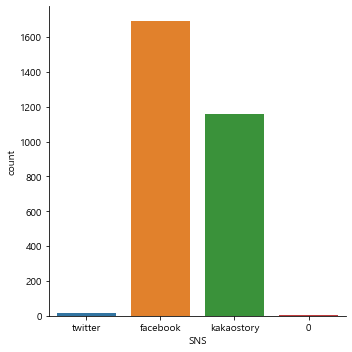

In [12]:
g = sns.catplot(data=df, x='SNS', kind='count', height=5)
g.set_xlabels()

## 1.3 주소 데이터

- 주소정보를 시각화하므로 Addr 열을 사용
- Xticklabels(rotation=90) : 주소가 길기 때문에 90도 회전시켜서 세로로 보이게 조정함.

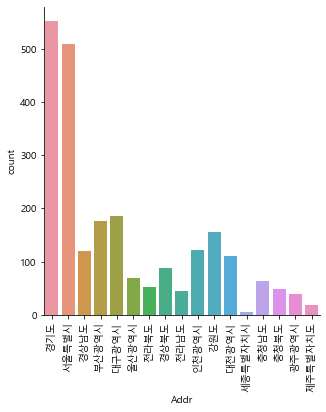

In [13]:
g = sns.catplot(data=df, x='Addr', kind='count', height=5)
g.set_xticklabels(rotation=90)
g.set_xlabels()

## 1.4 점수 데이터

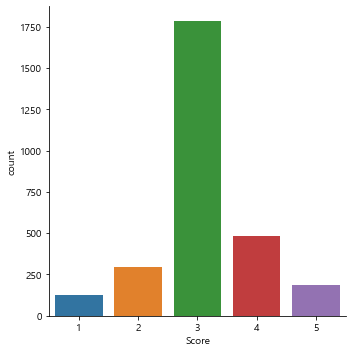

In [14]:
g = sns.catplot(data=df, x='Score', kind='count', height=5)
g.set_xlabels()

- 점수가 없을 경우를 dropna 함수를 사용해 제외
- 인덱스를 재부여
- 통합된 점수를 입력할 score2 생성

In [15]:
df = df.dropna(subset=['Score'])
df.index = range(0,len(df))
df['Score2'] = ''

1, 2점은 bad, 3점은 normal, 4, 5점은 good으로 통합

In [16]:
for i in range(0,len(df)) :
    if(df['Score'][i] < 3) :
        df['Score2'][i] = 'bad'
    elif (df['Score'][i] > 3) :
        df['Score2'][i] = 'good'
    elif (df['Score'][i] == 3) :
        df['Score2'][i] = 'normal'
df.head()

C:\Users\82104\AppData\Local\Temp\ipykernel_19136\2493491295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score2'][i] = 'good'
C:\Users\82104\AppData\Local\Temp\ipykernel_19136\2493491295.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score2'][i] = 'bad'
C:\Users\82104\AppData\Local\Temp\ipykernel_19136\2493491295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score2'][i] = 'normal'


,Score,Review,SNS,Addr,Score2
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


- 새로 부여한 Score2 값을 가지고 시각화

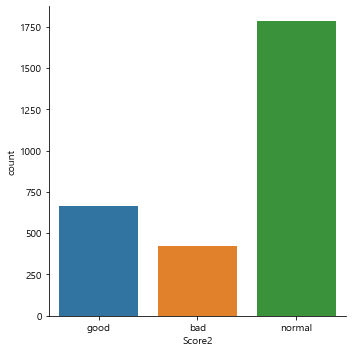

In [17]:
g = sns.catplot(data=df, x='Score2', kind='count', height=5)
g.set_xlabels()

- 데이터 셋 저장

In [18]:
df.to_csv('customer_data(filtered)_generated.csv')

# 2. 분류

**데이터 셋 준비**
- 고객 텍스트 데이터의 good, normal, bad 여부를 훈련, 분류
- 데이터 셋 준비 - 저장한 데이터 셋을 다시 불러옴

In [19]:
df = pd.read_csv('customer_data(filtered)_generated.csv', index_col=0, encoding='utf-8')
df.head()

,Score,Review,SNS,Addr,Score2
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


- 데이터 형식을 str로 바꾼 다음 list로 다시 변경

In [20]:
review_data = df['Review'].astype(str).tolist()
review_label = df['Score2'].astype(str).tolist()

- 데이터 셋의 80%는 training set으로, 나머지 20%는 test set으로 구성
- 기계학습 알고리즘에 적용하기 위해서 np.array() 를 사용해 데이터 형식을 변형
- Review_data는 x_train, x_test로 분할 (분할 범위 내의 data를 join함수를 사용해 연결)
- Review_label은 y_train, y_test로 분할

In [21]:
trainset_size = int(round(len(review_data)*0.80))

x_train = np.array([''.join(data) for data in review_data[0:trainset_size]])
y_train = np.array([data for data in review_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in review_data[trainset_size+1:len(review_data)]])
y_test = np.array([data for data in review_label[trainset_size+1:len(review_label)]])

- fit_transform 함수를 사용해서 training set을 기반으로 문서단어행렬 구성
- Transform 함수를 사용해서 test_set을 기반으로 문서단어행렬 구성
- Fit_transform() 은 fit 함수와 transform 함수의 기능이 합쳐진 함수

In [22]:
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

- 컬럼명이 Classifier, F-Measure, Accuracy인 데이터프레임 df_per 생성

In [23]:
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


**성능 평가 패키지 import**
- confusion matrix : 분류 결과 건수를 나타내는 confusion matrix를 구성하는 모듈
- classification report : recall, precision, f-measure를 제공하는 모듈
- f1_score : f measure 값을 계산
- accuracy score : accuracy 값을 계산

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

**Naive Bayes**
- MultinomialNB 패키지를 import
- fit 함수를 사용하여 모델 학습
- predict 함수를 사용해 예측값 추출 진행
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 nb_pred를 비교해서 각각 출력
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림

In [25]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pred))
print('\n Classification Report \n')
print(classification_report(y_test, nb_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pred, normalize=True),2))


 Confusion Matrix 

[[  0   0  60]
 [  0   7  94]
 [  0   2 410]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        60
        good       0.78      0.07      0.13       101
      normal       0.73      1.00      0.84       412

    accuracy                           0.73       573
   macro avg       0.50      0.35      0.32       573
weighted avg       0.66      0.73      0.63       573


 Accuracy 

0.73


C:\Users\82104\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82104\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\82104\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**성능 저장**
- f1_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- average=‘weighted’를 사용해 각 클래스마다 가중치 적용
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- accuracy_score 함수를 사용해 실제값과 분류 결과값을 비교해 accuracy 계산
- normalize=True를 통해 정확도 출력, False일 경우 올바르게 분류된 데이터 건수 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- loc 함수를 사용해 데이터 프레임에 인덱스를 지정해 입력

In [26]:
fm = round(f1_score(y_test, nb_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73


**Decision Tree**
- DecisionTreeClassifier 패키지를 import
- DecisionTreeClassifier 모듈을 사용해 decision tree 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 dt_classifier 훈련
- predict 함수를 사용해 예측값 추출 진행
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 dt_pred를 비교해서 각각 출력
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test, dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred, normalize=True),2))


 Confusion Matrix 

[[ 36   0  24]
 [  0  58  43]
 [ 35  53 324]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.51      0.60      0.55        60
        good       0.52      0.57      0.55       101
      normal       0.83      0.79      0.81       412

    accuracy                           0.73       573
   macro avg       0.62      0.65      0.63       573
weighted avg       0.74      0.73      0.73       573


 Accuracy 

0.73


**성능 저장**

In [28]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.73,0.73


**Random Forest**
- RandomForestClassifier 패키지를 import
- RandomForestClassifier 모듈을 사용해 random forest 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 rf_classifier 훈련
- predict 함수를 사용해 예측값 추출 진행
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 dt_pred를 비교해서 각각 출력
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력round 함수를 사용해 소수점 2번째 자리까지 반올림

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, rf_pred, normalize=True),2))


 Confusion Matrix 

[[ 48   0  12]
 [  0  54  47]
 [ 25   3 384]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.66      0.80      0.72        60
        good       0.95      0.53      0.68       101
      normal       0.87      0.93      0.90       412

    accuracy                           0.85       573
   macro avg       0.82      0.76      0.77       573
weighted avg       0.86      0.85      0.84       573


 Accuracy 

0.85


**성능 저장**

In [30]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.73,0.73
2,Random Forest,0.84,0.85


**SVM**
- LinearSVC 패키지를 import
- LinearSVC 모듈을 사용해 svm 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 svm_classifier 훈련
- predict 함수를 사용해 예측값 추출 진행
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 dt_pred를 비교해서 각각 출력
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림

In [31]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, svm_pred, normalize=True),2))


 Confusion Matrix 

[[ 38   0  22]
 [  0  62  39]
 [ 43  45 324]]

 Classification Report 

              precision    recall  f1-score   support

         bad       0.47      0.63      0.54        60
        good       0.58      0.61      0.60       101
      normal       0.84      0.79      0.81       412

    accuracy                           0.74       573
   macro avg       0.63      0.68      0.65       573
weighted avg       0.76      0.74      0.75       573


 Accuracy 

0.74


**성능 저장**

In [32]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.73,0.73
2,Random Forest,0.84,0.85
3,Support Vector Machine,0.75,0.74


**성능 비교**
- 시각화를 위해 분류기 명을 set_index 함수를 사용해 index로 설정

In [33]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.63,0.73
Decison Tree,0.73,0.73
Random Forest,0.84,0.85
Support Vector Machine,0.75,0.74


- F-measure과 Accuracy 값을 plot 함수를 사용해 시각화
- kind=‘bar’ : 막대 그래프
- title=‘preformance’ : 그래프 제목
- figsize : 그래프 크기 지정
- legend : 데이터 설명
- fontsize : 글씨 크기
- 그래프의 x축을 분류기 명으로 지정
- 그래프 그리기

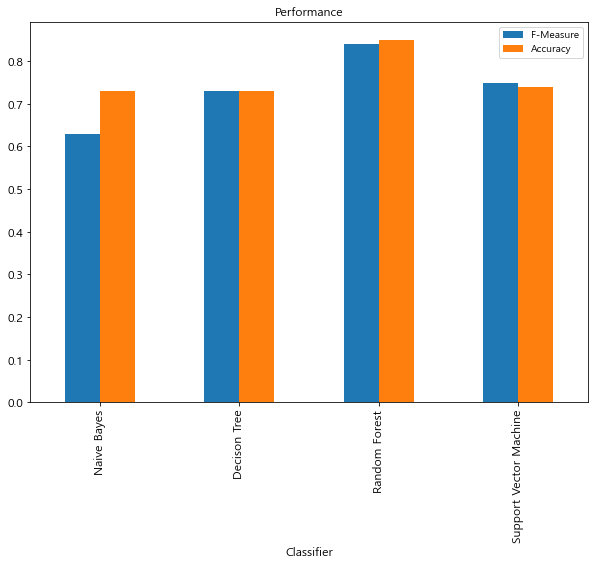

In [34]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title ='Performance'
                                             , figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()